## Выборка данных Chess (King-Rook vs. King)

* Ссылка на выборку: https://archive.ics.uci.edu/ml/datasets/Chess+%28King-Rook+vs.+King%29
* Описание выборки: Задача состоит в определении количества ходов(от 0 до 16) для победы белых фигур в эндшпиле или определении, что наступила ничья(18 класс). Атрибуты представляют собой местоположение фигур(белого и черного королей и белой ладьи) на доске.
* Количество классов: 18
* Количество признаков: 6
* Количество объектов: 28056

# Метрические методы классификации


In [9]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np

from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from mlxtend.plotting import plot_decision_regions

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data", sep=',', names=['White_King_file', 'White King rank', 'White Rook file', 'White Rook rank', 'Black King file', 'Black King rank', 'optimal depth-of-win'])

def snake_case(s):
    return s.lower().replace(' ', '_')
data = data.rename(columns=dict(zip(data.columns,map(snake_case,data.columns))))

X = data[['white_king_file', 'white_king_rank', 'white_rook_file', 'white_rook_rank', 'black_king_file', 'black_king_rank']]
Y = data['optimal_depth-of-win']

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
Y = le.fit_transform(Y)
X['white_king_file'] = le.fit_transform(X['white_king_file'])
X['white_king_rank'] = le.fit_transform(X['white_king_rank'])
X['white_rook_file'] = le.fit_transform(X['white_rook_file'])
X['white_rook_rank'] = le.fit_transform(X['white_rook_rank'])
X['black_king_file'] = le.fit_transform(X['black_king_file'])
X['black_king_rank'] = le.fit_transform(X['black_king_rank'])

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.2,
                                                    random_state = 42) 

## Метод ближайшего соседа (1NN)

In [15]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
# Доля правильных ответов метода
print('Обучающая выборка   : ', model.score(X_train, Y_train))
print('Контрольная выборка : ', model.score(X_test, Y_test))

Обучающая выборка   :  1.0
Контрольная выборка :  0.5163934426229508


## Метод k-ближайших соседей (KNN)

Лучшее число соседей (k)   : 7
Процент ошибок на обучении : 10.938335412582422 %
Процент ошибок на контроле : 23.55666429080542 %
Лучшее число соседей (k)   : 7
Процент ошибок на обучении : 10.956157547674216 %
Процент ошибок на контроле : 22.826086956521742 %
Лучшее число соседей (k)   : 7
Процент ошибок на обучении : 11.005168419176615 %
Процент ошибок на контроле : 23.12900926585887 %
Лучшее число соседей (k)   : 7
Процент ошибок на обучении : 10.991801817857782 %
Процент ошибок на контроле : 22.75481111903065 %
Лучшее число соседей (k)   : 7
Процент ошибок на обучении : 11.201211905186238 %
Процент ошибок на контроле : 24.144689950106912 %
Лучшее число соседей (k)   : 7
Процент ошибок на обучении : 10.929424345036532 %
Процент ошибок на контроле : 23.111190306486094 %
Лучшее число соседей (k)   : 8
Процент ошибок на обучении : 11.15665656745678 %
Процент ошибок на контроле : 23.360655737704917 %
Лучшее число соседей (k)   : 7
Процент ошибок на обучении : 11.210122972732128 %
Процен

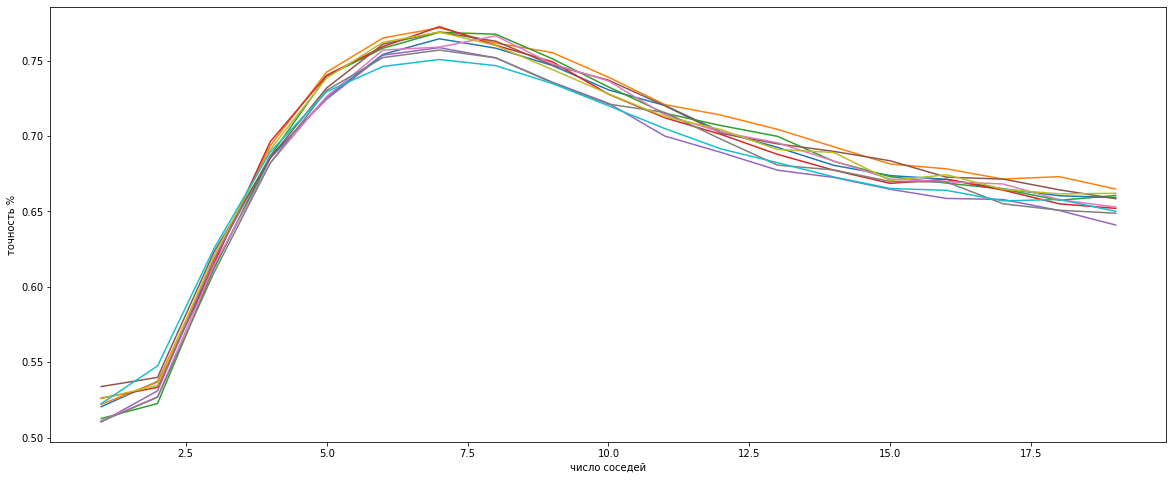

In [ ]:
plt.figure(figsize=(20,8))
for i in range(0, 10):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                      test_size = 0.2,
                                                      random_state = i)
  #print('K\t', 'Обучение\t\t', 'Контроль');

  models = []
  train_accuracy = []
  test_accuracy = []
  max_k = 20
  for n_neighbors in range(1, max_k):
      model = KNeighborsClassifier(n_neighbors = n_neighbors)
      model.fit(X_train, Y_train)
      models.append(model)
      #print(n_neighbors, '\t', model.score(X_train, Y_train), end = '')
      a = str(model.score(X_train, Y_train))
      #if len(a) < 15:
      #   print('\t\t', end = '')
      #print('\t', model.score(X_test, Y_test))   
      train_accuracy.append(model.score(X_train, Y_train))
      test_accuracy.append(model.score(X_test, Y_test))
  best_k = test_accuracy.index(max(test_accuracy)) + 1
  print('Лучшее число соседей (k)   :', best_k)
  print('Процент ошибок на обучении :', (1-train_accuracy[best_k - 1]) * 100, '%')
  print('Процент ошибок на контроле :', (1-test_accuracy[best_k - 1]) * 100, '%')

  plt.plot(range(1, max_k), test_accuracy)
  plt.xlabel('число соседей')
  plt.ylabel('точность %')
plt.show()

# Метод окна Парзена (Parzen)

Лучшая ширина окна (h)     :  1
Процент ошибок на обучении :  42.929067902334694 %
Процент ошибок на контроле :  49.41197434069851 %
Лучшая ширина окна (h)     :  1
Процент ошибок на обучении :  42.71074674746035 %
Процент ошибок на контроле :  48.00427655024947 %
Лучшая ширина окна (h)     :  1
Процент ошибок на обучении :  42.71520228123329 %
Процент ошибок на контроле :  49.30506058446187 %
Лучшая ширина окна (h)     :  1
Процент ошибок на обучении :  42.612725004455534 %
Процент ошибок на контроле :  49.16250890947968 %
Лучшая ширина окна (h)     :  1
Процент ошибок на обучении :  43.10728925325253 %
Процент ошибок на контроле :  51.35424091233072 %


KeyboardInterrupt: ignored

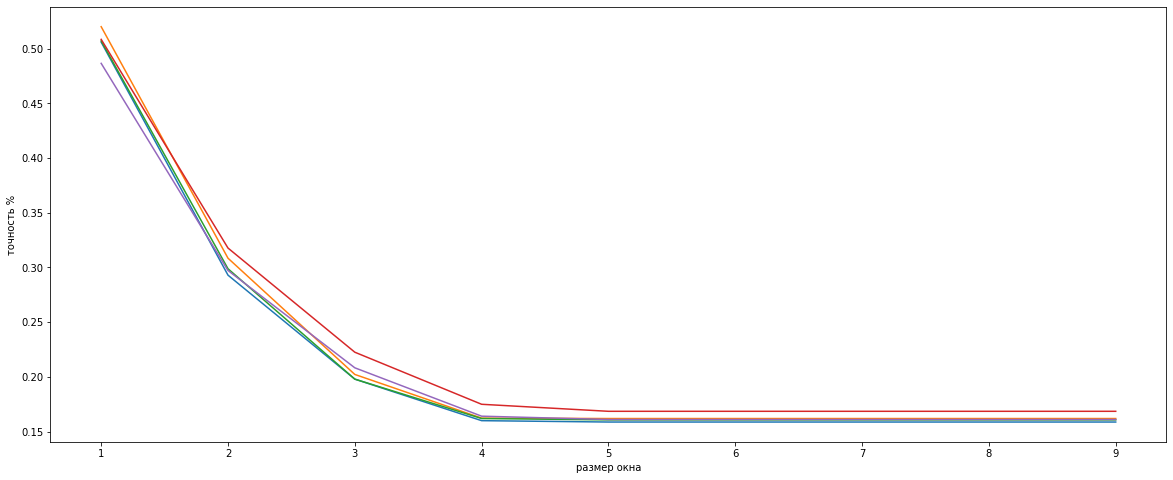

In [ ]:
class KDEClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, bandwidth = 1.0, kernel = 'gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims = True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

plt.figure(figsize=(20,8))
for i in range(0, 10):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                      test_size = 0.2,
                                                      random_state = i)
  #print('K\t', 'Обучение\t\t', 'Контроль', end = '')
  #print()
  train_accuracy = []
  test_accuracy = []
  max_h = 10
  for i in range(1, max_h):
    model = KDEClassifier(bandwidth = i)
    model.fit(X_train, Y_train)
    models.append(model)
    train_accuracy.append(model.score(X_train, Y_train))
    #print(i, '\t', model.score(X_train, Y_train), end = '')
    a = str(model.score(X_train, Y_train))
    #if len(a) < 15:
        #print('\t\t', end = '')
    test_accuracy.append(model.score(X_test, Y_test))
    #print('\t', model.score(X_test, Y_test))    
  best_h = test_accuracy.index(max(test_accuracy)) + 1
  print('Лучшая ширина окна (h)     : ', best_h)
  print('Процент ошибок на обучении : ', (1-train_accuracy[best_h - 1]) * 100, '%')
  print('Процент ошибок на контроле : ', (1-test_accuracy[best_h - 1]) * 100, '%')

  plt.plot(range(1, max_h), test_accuracy)
  plt.xlabel('размер окна')
  plt.ylabel('точность %')
plt.show()

# Логические методы классификации

## Алгоритм "Решающее дерево" (DecisionTree).

In [17]:
model = DecisionTreeClassifier(criterion='gini', max_depth=22, random_state=0)
model.fit(X_train, Y_train)

print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))

Train:  0.9998217786490822
Test :  0.8480042765502495
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       549
           1       0.86      0.87      0.86       287
           2       0.83      0.83      0.83       609
           3       0.82      0.87      0.85       406
           4       0.88      0.93      0.91        92
           5       0.97      0.76      0.85        41
           6       0.88      0.90      0.89       922
           7       0.83      0.84      0.84       346
           8       0.91      0.91      0.91        22
           9       0.80      0.82      0.81       129
          10       0.89      0.88      0.89       128
          11       0.82      0.87      0.85        76
          12       0.83      0.85      0.84       371
          13       0.86      0.84      0.85       821
          14       0.60      1.00      0.75        12
          15       0.84      0.85      0.85       746
          16       0.96    

лучшая глубина дерева:  22
лучший результат на Train:  0.9998663339868116
лучший результат на Test :  0.8406985032074127 

лучшая глубина дерева:  21
лучший результат на Train:  0.9995544466227054
лучший результат на Test :  0.8478260869565217 

лучшая глубина дерева:  22
лучший результат на Train:  0.9998217786490822
лучший результат на Test :  0.8442622950819673 

лучшая глубина дерева:  20
лучший результат на Train:  0.9996881126358937
лучший результат на Test :  0.8453314326443335 

лучшая глубина дерева:  22
лучший результат на Train:  0.9998217786490822
лучший результат на Test :  0.8526372059871703 

лучшая глубина дерева:  22
лучший результат на Train:  0.9993316699340581
лучший результат на Test :  0.8342836778332146 

лучшая глубина дерева:  21
лучший результат на Train:  0.9998217786490822
лучший результат на Test :  0.8421240199572345 

лучшая глубина дерева:  21
лучший результат на Train:  0.9998217786490822
лучший результат на Test :  0.8423022095509622 

лучшая глубина д

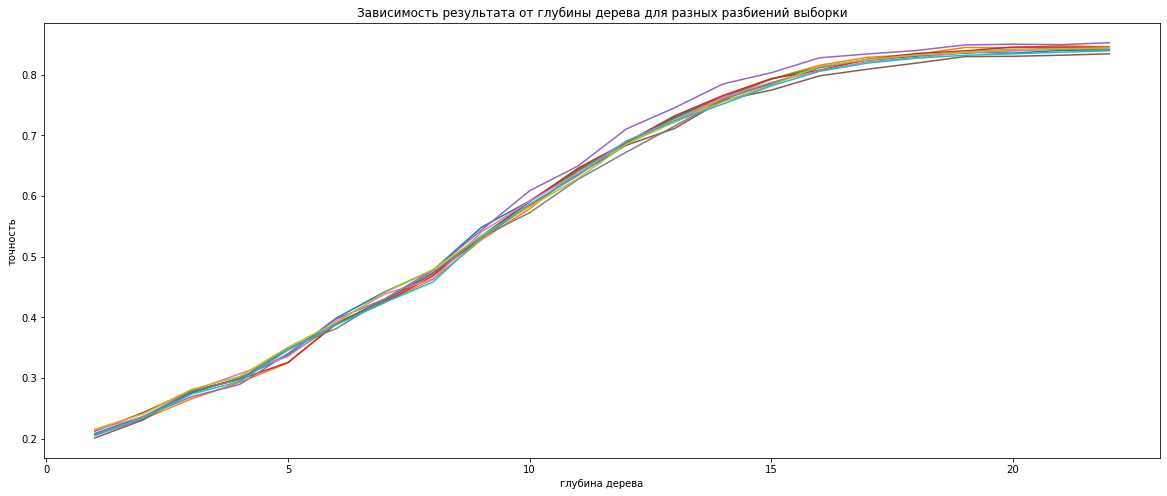

In [ ]:
# Зависимость результата от глубины дерева
plt.figure(figsize=(20, 8))
for i in range(0, 10):
  train_accuracy = []
  test_accuracy = []
  X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y,  
                                                      test_size = 0.2,
                                                      random_state = i) 
  for depth in range(1, 23):
      model = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
      model.fit(X_train, Y_train)
      train_accuracy.append(model.score(X_train, Y_train))
      test_accuracy.append(model.score(X_test, Y_test))
      best_d = test_accuracy.index(max(test_accuracy)) + 1
  print('лучшая глубина дерева: ', best_d)
  print('лучший результат на Train: ', max(train_accuracy))
  print('лучший результат на Test : ', max(test_accuracy), '\n')
  plt.xlabel('глубина дерева')
  plt.ylabel('точность')
  plt.title('Зависимость результата от глубины дерева для разных разбиений выборки')
  plt.plot(range(1, 23), test_accuracy)
plt.show()

## Алгоритм "Случайный лес" (RandomForest).

Наилучшая глубина: 21
Train:  0.9999108893245411
Test :  0.8660014255167499
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       548
           1       0.87      0.87      0.87       279
           2       0.85      0.85      0.85       578
           3       0.84      0.89      0.86       446
           4       0.91      0.92      0.91        87
           5       0.90      0.88      0.89        40
           6       0.88      0.90      0.89       891
           7       0.88      0.84      0.86       358
           8       1.00      0.91      0.95        11
           9       0.82      0.71      0.76       140
          10       0.86      0.86      0.86       117
          11       0.90      0.79      0.84        89
          12       0.84      0.85      0.84       392
          13       0.88      0.89      0.89       838
          14       0.75      0.92      0.83        13
          15       0.89      0.83      0.86       738
     

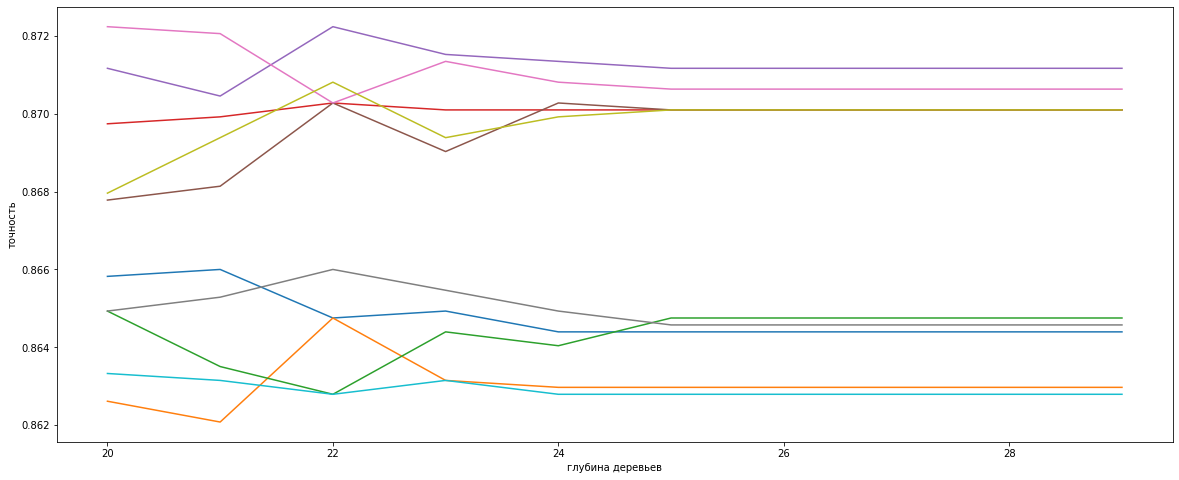

In [ ]:
plt.figure(figsize=(20, 8))
plt.xlabel('глубина деревьев')
plt.ylabel('точность')
for i in range(0, 10):
  train_accuracy = []
  test_accuracy = []
  X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y,  
                                                      test_size = 0.2,
                                                      random_state = i) 
  for j in range(20, 30):
    model = RandomForestClassifier(criterion='gini', n_estimators=67,
                                  max_depth=j, max_features=6, random_state=0)
    model.fit(X_train, Y_train)
    train_accuracy.append(model.score(X_train, Y_train))
    test_accuracy.append(model.score(X_test, Y_test))
    if(test_accuracy[-1] == max(test_accuracy)):
      best_depth = j
  print(f'Наилучшая глубина: {best_depth}')
  print('Train: ', max(train_accuracy))
  print('Test : ', max(test_accuracy))
  print(classification_report(Y_test, model.predict(X_test)))
  plt.plot(range(20, 30), test_accuracy)

In [ ]:
# Зависимость результата от количества деревьев

models = []
train_accuracy = []
test_accuracy = []
n_estimators = list(range(1, 70))
for estimators in n_estimators:
    model = RandomForestClassifier(criterion='entropy', n_estimators=estimators,
                                   random_state=0)
    model.fit(X_train, Y_train)
    models.append(model)
    test_accuracy.append(model.score(X_test, Y_test))
    train_accuracy.append(model.score(X_train, Y_train))

лучшее число деревьев:  67


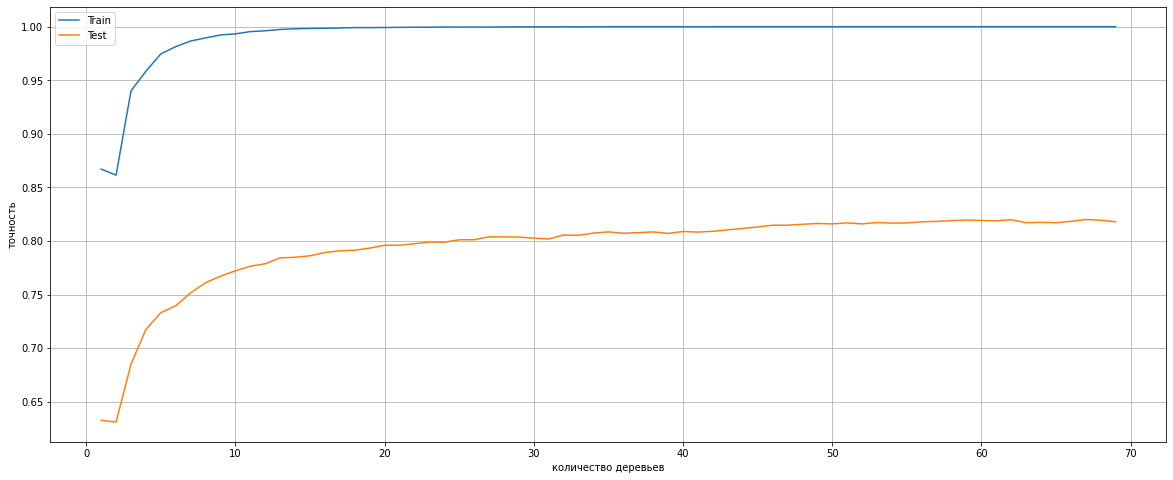

In [ ]:
best_ne = test_accuracy.index(max(test_accuracy)) + 1
print('лучшее число деревьев: ', best_ne)
plt.figure(figsize=(20, 8))
plt.xlabel('количество деревьев')
plt.ylabel('точность')
plt.plot(n_estimators, train_accuracy, label='Train')
plt.plot(n_estimators, test_accuracy, label='Test')

plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
# Зависимость качества от числа признаков при расщеплении

models = []
train_accuracy = []
test_accuracy = []
max_features = list(range(1, 7))
for features in max_features:
    model = RandomForestClassifier(criterion='entropy', n_estimators=67, 
                                   max_features=features, random_state=0)
    model.fit(X_train, Y_train)
    models.append(model)
    test_accuracy.append(model.score(X_test, Y_test))
    train_accuracy.append(model.score(X_train, Y_train))

лучшее число признаков:  6


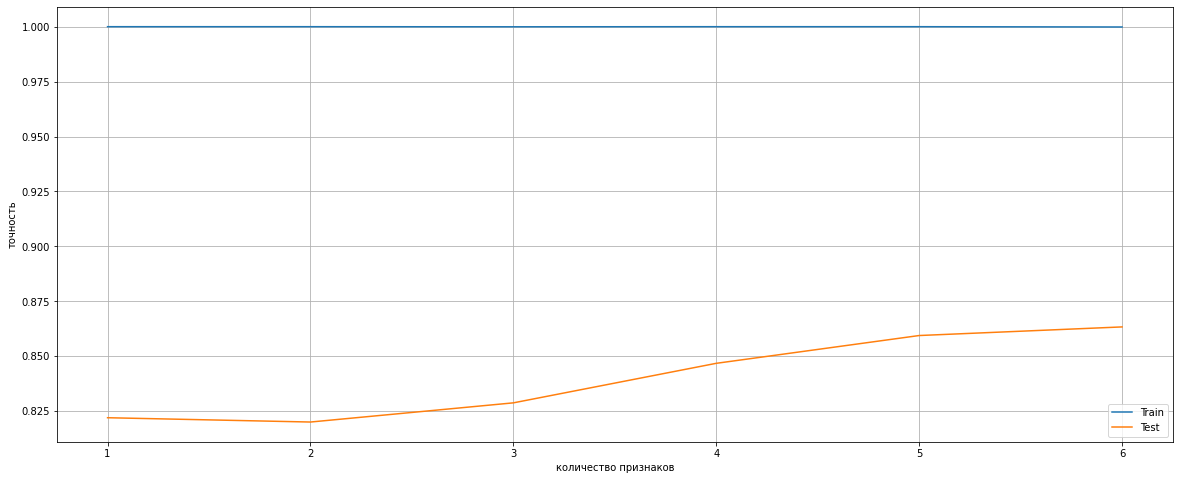

In [ ]:
best_f = test_accuracy.index(max(test_accuracy)) + 1
print('лучшее число признаков: ', best_f)
plt.figure(figsize=(20, 8))
plt.xlabel('количество признаков')
plt.ylabel('точность')
plt.plot(max_features, train_accuracy, label='Train')
plt.plot(max_features, test_accuracy, label='Test')

plt.legend(loc='Best')
plt.grid()
plt.show()

In [ ]:
# Зависимость результата от глубины деревьев

models = []
train_accuracy = []
test_accuracy = []
current_depth = []
max_depth = list(range(1, 30))
for depth in max_depth:
    model = RandomForestClassifier(criterion='entropy', n_estimators=67,
                                   max_depth=depth, random_state=0)
    model.fit(X_train, Y_train)
    models.append(model)
    test_accuracy.append(model.score(X_test, Y_test))
    train_accuracy.append(model.score(X_train, Y_train))
    current_depth.append(model.estimators_[0].get_depth())

лучшая глубина:  27


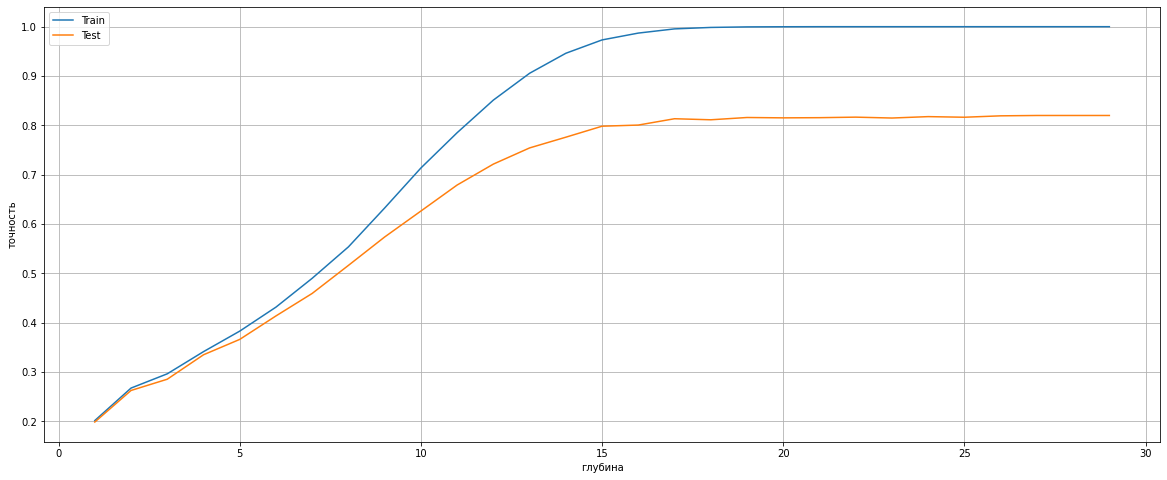

In [ ]:
best_d = test_accuracy.index(max(test_accuracy)) + 1
print('лучшая глубина: ', best_d)
plt.figure(figsize=(20, 8))
plt.xlabel('глубина')
plt.ylabel('точность')
plt.plot(max_depth, train_accuracy, label='Train')
plt.plot(max_depth, test_accuracy, label='Test')
#plt.plot(max_depth, current_depth, label='Real depth')

plt.legend(loc='Best')
plt.grid()
plt.show()

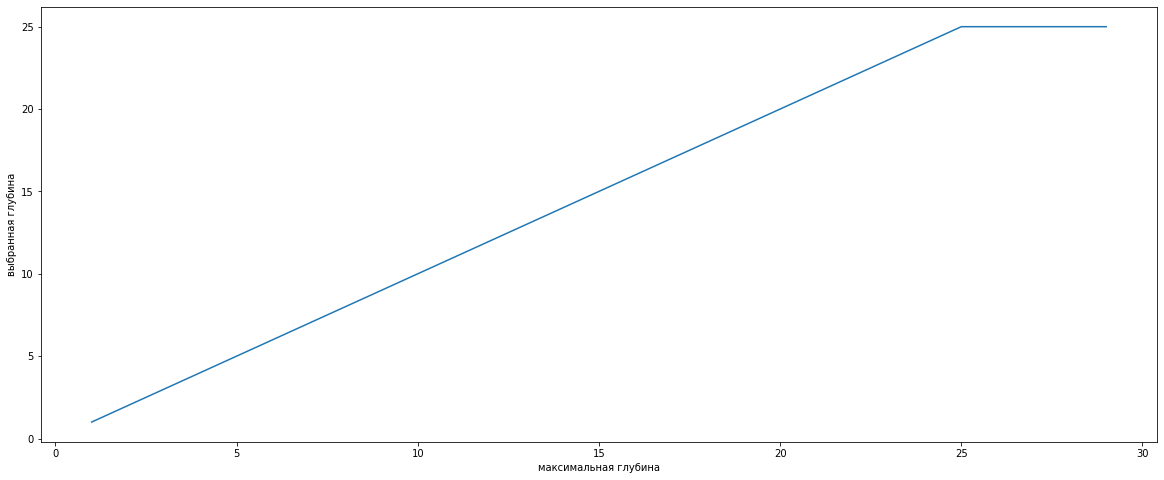

In [ ]:
plt.figure(figsize=(20, 8))
plt.xlabel('максимальная глубина')
plt.ylabel('выбранная глубина')
plt.plot(max_depth, current_depth, label='Real depth')

---


##Заключение

###1. Выборка данных (датасет)

* Ссылка на выборку: https://archive.ics.uci.edu/ml/datasets/Chess+%28King-Rook+vs.+King%29
* Описание выборки: Задача состоит в определении количества ходов(от 0 до 16) для победы белых фигур в эндшпиле или определении, что наступила ничья(18 класс). Атрибуты представляют собой местоположение фигур(белого и черного королей и белой ладьи) на доске.
* Количество классов: 18
* Количество признаков: 6
* Количество объектов: 28056

###2. Метод ближайшего соседа (1NN)

Описание эксперимента: По одному ближайшему объекту определить класс объекта

Результаты эксперимента:
* Процент ошибок на обучении: 0%
* Процент ошибок на контроле: 49%

###3. Метод k ближайших соседей (KNN)

Описание эксперимента: Необходимо по n ближайших объектов определить класс объекта, где n перебирается от 1 до 19

Результаты эксперимента:
* Лучшее количество соседей: 7(на большинстве случайных подвыборок исходной выборки), 8 при некоторых подвыборках
* Процент ошибок на обучении: 10-11%(в зависимости от подвыборки)
* Процент ошибок на контроле: 22-24%

###4. Метод окна Парзена (Parzen)

Описание эксперимента: Необходимо подбирая радиус окна определить класс объекта по входящим в это окно объектам

Результаты эксперимента:
* Лучшее количество соседей: 1
* Процент ошибок на обучении: 42-43%
* Процент ошибок на контроле: 49-51%

### 5. Алгорим "Решающее дерево" (DecisionTree)

* Критерий информативности: criterion=gini
* Глубина дерева: max_depth=22
* Качество на обучающей выборке: 0.99
* Качество на контрольной выборке: 0.84


### 6. Алгоритм "Случайный лес" (RandomForest)

* Количество деревьев: n_estimators=67
* Признаки для разделения: max_features=6
* Качество на обучающей выборке: 0.99
* Качество на контрольной выборке: 0.86-0.87(в зависимости от разбиения выборки)

###7. Вывод

Лучший результат продемонстрировал метод RandomForest